In [1]:
import os
import pickle as pkl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from transvae.analysis import get_top_2_most_correlated_PCs, make_model_name, get_latent_spaces
from scipy.stats import pearsonr

In [2]:
SAVE_FIGURES=False

In [3]:
data_dir="analysis/"
os.listdir(data_dir)

['nohup_BCH98mask_identity_LOOP.out',
 'transvae-64-peptides-bch-zScoreNormalized-organized-dPP64-ZScore',
 'nohup_98infer.out',
 'nohup_98pcaPlot.out',
 'nohup_pl10mic0mask_identity_10init.out',
 'transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'nohup_boloopB0mask_identity.out',
 'nohup_log10micInfer.out',
 'transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized',
 'nohup_c50mask_PCA.out',
 'nohup_log10micModelInfer2.out',
 'nohup_bc75mask_identity.out',
 'nohup_model_infer.out',
 'transvae-64-peptides-log10mic-zScoreNormalized-organized-cdhit90-zScoreNormalized',
 'nohup_b75mask_identity.out',
 'nohup_log10micPCAplots.out',
 'nohup_ls_infer_full_train.out',
 'nohup_boloopBCH98mask_PCA_50init.out',
 'nohup_pca0mask.out',
 'transvae-64-peptides-bch-zScoreNormalized-75-organized-cdhit90-zScoreNormalized',
 'nohup_b50mask_PCA.out',
 'nohup_pca.out',
 'nohup_pl10mic0mask_pca.out',
 'transvae-64-peptides-bch-zScoreNormalized-5

In [4]:
os.listdir("data/properties/")

['peptides_2024_cdhit90_unbalanced_train_boman_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_hydrophobicity_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_hydrophobicity_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_boman_chargepH7p2_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_boman_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_test_properties_zScoreNormalized.txt',
 'peptides_2024_cdhit90_unbalanced_train_boman_properties_zScoreNormalized.txt']

## Get data

In [5]:
bch_properties = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_train_properties_zScoreNormalized.txt")
bch_properties_test = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_test_properties_zScoreNormalized.txt")

In [6]:
bch_properties.head(3)

,boman,charge(pH=7.2),hydrophobicity
0,2.758657,-0.024240,-2.009120
1,3.849545,0.196433,-4.014466
2,5.880969,0.398120,-4.014466


## get latent spaces

In [7]:
latent_spaces = get_latent_spaces()

_d='transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized'
_f='mu_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_train.npy'

_d='transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_f='mu_transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_train.npy'

_d='transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized'
_f='mu_transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_train.npy'

_d='transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized'
_f='mu_transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_train.npy'

_d='transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized'
_f='mu_transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_train.npy'

_d='transvae-64-peptides-hydrophobicity-zScoreNormalized-organized

In [8]:
latent_spaces.keys()

dict_keys(['boman-0', 'boman-25', 'boman-50', 'boman-75', 'boman-98', 'hydrophobicity-0', 'hydrophobicity-25', 'hydrophobicity-50', 'hydrophobicity-75', 'hydrophobicity-98', 'chargepH7p2-0', 'chargepH7p2-25', 'chargepH7p2-50', 'chargepH7p2-75', 'chargepH7p2-98', 'boman-chargepH7p2-0', 'boman-chargepH7p2-25', 'boman-chargepH7p2-50', 'boman-chargepH7p2-75', 'boman-chargepH7p2-98', 'bch-0', 'bch-25', 'bch-50', 'bch-75', 'bch-98', 'predicted-log10mic-0', 'predicted-log10mic-98'])

In [9]:
latent_spaces["boman-0"].shape

(523848, 64)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=5)
pca.fit(latent_spaces["bch-0"])

PCA(n_components=5)

In [12]:
pca_latent_spaces = pca.transform(latent_spaces["bch-0"])

In [13]:
bch_properties.shape

(523848, 3)

In [14]:
def make_scatter_plot_w_barplot(df, col1, col2, col3, fig, alpha=0.7, raster=False):
    # fig = plt.figure(figsize=(9, 7))
    gs = fig.add_gridspec(2, 1, height_ratios=[4, 1], hspace=0.00)
    ax_scatter = fig.add_subplot(gs[0, 0])
    ax_bar     = fig.add_subplot(gs[1, 0], sharex=ax_scatter)
    colour_palette="viridis"
    
    # ax=ax_scatter
    # ax2 = ax_bar
    # Bin col1 and compute average col3 in each bin
    bins = np.linspace(df[col2].min(), df[col2].max(), 20)  # 20 bins
    df["col2_bin"] = pd.cut(df[col2], bins)
    avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()

    ########################
    # Plot scatter of col2 vs col1, colored by col3
    # ax = fig.add_subplot(grid[0])
    ax_scatter = sns.scatterplot(
        data=df,
        x=col2, 
        y=col1, 
        hue=col3, 
        alpha=alpha,
        palette=colour_palette,
        edgecolor="none",
        rasterized=raster,
        ax=ax_scatter
        
    )
    
    #########################
    # add a colorbar to seaborn scatterplot
    norm = plt.Normalize(df[col3].min(), df[col3].max())
    sm = plt.cm.ScalarMappable(cmap=colour_palette)#, norm=norm)
    coll = ax_scatter.collections[0]
    cmap = coll.get_cmap()
    
    # # Remove the legend and add a colorbar
    ax_scatter.get_legend().remove()
    _xticks = ax_scatter.get_xticks()
    ax_scatter.set_xticks([]*len(_xticks))
    
    #########################
    # Plot histogram-like bars for average col3 in each col1 bin
    bin_centers = [interval.mid for interval in avg_col3_per_bin.index]
    ax_bar.bar(
        bin_centers, 
        avg_col3_per_bin, 
        width=np.diff(bins).mean()*0.8, 
        alpha=0.7, 
        label=f"Avg {col3} per bin", 
        color=cmap(norm(avg_col3_per_bin)) 
    )
    
    # set zero line
    ax_bar.hlines(y=0, xmin=bin_centers[0], xmax=bin_centers[-1]+1,color="gray", alpha=0.6)
    # sns.histplot(data=df, x="col1", ax=ax)
    
    ax_scatter.set_ylabel("")
    _yticks = ax_scatter.get_yticks()
    ax_scatter.set_yticks( []*len(_yticks) )
    
    _max = abs(avg_col3_per_bin).max()
    _max_5perc = _max*(1.05)
    ax_bar.set_ylim([(-1)*_max_5perc, _max_5perc])
    
    ax_scatter.set_xlabel("")
    # ax_bar.set_xlabel(col2)
    ax_bar.set_xlabel("")
    
    fontsize=16
    if col3=="boman":
        ax_bar.set_ylabel(f"B", fontsize=fontsize)
    elif col3=="charge":
        ax_bar.set_ylabel(f"q", fontsize=fontsize)
    elif col3=="hydrophobicity":
        ax_bar.set_ylabel(f"H", fontsize=fontsize)
        
    ax_bar.set_yticks([(-1)*int(_max), 0, int(_max)])
    _ytick_labels = ax_bar.get_yticklabels()
    ax_bar.set_yticklabels(_ytick_labels, fontsize=fontsize)
    # print(avg_col3_per_bin.max(), avg_col3_per_bin.min())

    sns.despine(ax=ax_scatter, left=True)
    sns.despine(ax=ax_bar)
    return fig

In [15]:
df = pd.DataFrame()
for i in range(5):
    df[f'pc{i+1}'] = pca_latent_spaces[:,i]

df['boman']          = bch_properties[         "boman"]
df['charge']         = bch_properties['charge(pH=7.2)']
df['hydrophobicity'] = bch_properties["hydrophobicity"]


In [16]:
pcs_and_corrs = get_top_2_most_correlated_PCs(df, "boman")

In [17]:
pcs_and_corrs

('pc2', 'pc3')

In [18]:
superfig = plt.figure(figsize=(12,6))
subfigs = superfig.subfigures(1, 3, wspace=0.0, hspace=0.08)
p1 = (df, "pc1", "pc2", "boman")
p2 = (df, "pc1", "pc5", "charge")
p3 = (df, "pc1", "pc2", "hydrophobicity")
p4 = None

percentages = [0,25]#,50,75,98]

pca = PCA(n_components=5)
for _perc in percentages:
    _key = f"bch-{_perc}"
    
    pca.fit(latent_spaces[_key])
    pca_latent_spaces = pca.transform(latent_spaces[_key])
    
    df = pd.DataFrame()
    for i in range(5):
        df[f'pc{i+1}'] = pca_latent_spaces[:,i]
    
    df['boman']          = bch_properties[         "boman"]
    df['charge']         = bch_properties['charge(pH=7.2)']
    df['hydrophobicity'] = bch_properties["hydrophobicity"]

# g = sns.JointGrid(data=df, x="col1", y="col2", hue="col3")
# g.plot_marginals(sns.distplot, kde=False, color="gray")
# g.plot_joint(plt.scatter, color="gray", alpha=.2)

<Figure size 1200x600 with 0 Axes>

/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()
/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()
/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


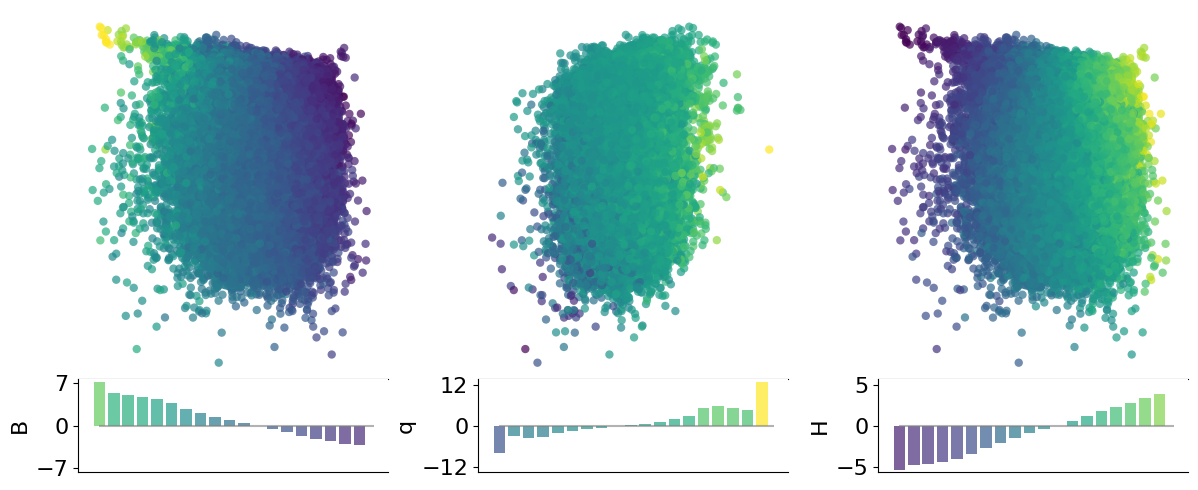

In [19]:
superfig = plt.figure(figsize=(12,6))
subfigs = superfig.subfigures(1, 3, wspace=0.0, hspace=0.08)
p1 = (df, "pc1", "pc2", "boman")
p2 = (df, "pc1", "pc5", "charge")
p3 = (df, "pc1", "pc2", "hydrophobicity")
p4 = None
for sf, payload in zip(subfigs.flat, [p1, p2, p3, p4]):  # p1..p4 = data/args per panel
    if payload is None:
        continue
    
    sf = make_scatter_plot_w_barplot(payload[0], payload[1], payload[2], payload[3], sf)
    

In [22]:
subpanel_labels = {
    (0,0):"a.",
    (0,1):"b.",
    (0,2):"c.",
    (1,0):"d.",
    (1,1):"e.",
    (1,2):"f.",
    (2,0):"g.",
    (2,1):"h.",
    (2,2):"i.",
    (3,0):"j.",
    (3,1):"k.",
    (3,2):"l.",
    (4,0):"m.",
    (4,1):"n.",
    (4,2):"o."
}

subpanel: a.at _perc=0, and organizing prop=b, the top two PCs are pc2, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: b.at _perc=0, and organizing prop=c, the top two PCs are pc5, pc2


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: c.at _perc=0, and organizing prop=h, the top two PCs are pc2, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: d.at _perc=25, and organizing prop=b, the top two PCs are pc2, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: e.at _perc=25, and organizing prop=c, the top two PCs are pc5, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: f.at _perc=25, and organizing prop=h, the top two PCs are pc2, pc4


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: g.at _perc=50, and organizing prop=b, the top two PCs are pc2, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: h.at _perc=50, and organizing prop=c, the top two PCs are pc4, pc5


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: i.at _perc=50, and organizing prop=h, the top two PCs are pc2, pc1


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: j.at _perc=75, and organizing prop=b, the top two PCs are pc2, pc1


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: k.at _perc=75, and organizing prop=c, the top two PCs are pc3, pc4


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: l.at _perc=75, and organizing prop=h, the top two PCs are pc2, pc1


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: m.at _perc=98, and organizing prop=b, the top two PCs are pc1, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: n.at _perc=98, and organizing prop=c, the top two PCs are pc3, pc1


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


subpanel: o.at _perc=98, and organizing prop=h, the top two PCs are pc1, pc3


/tmp/ipykernel_128216/2376290408.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


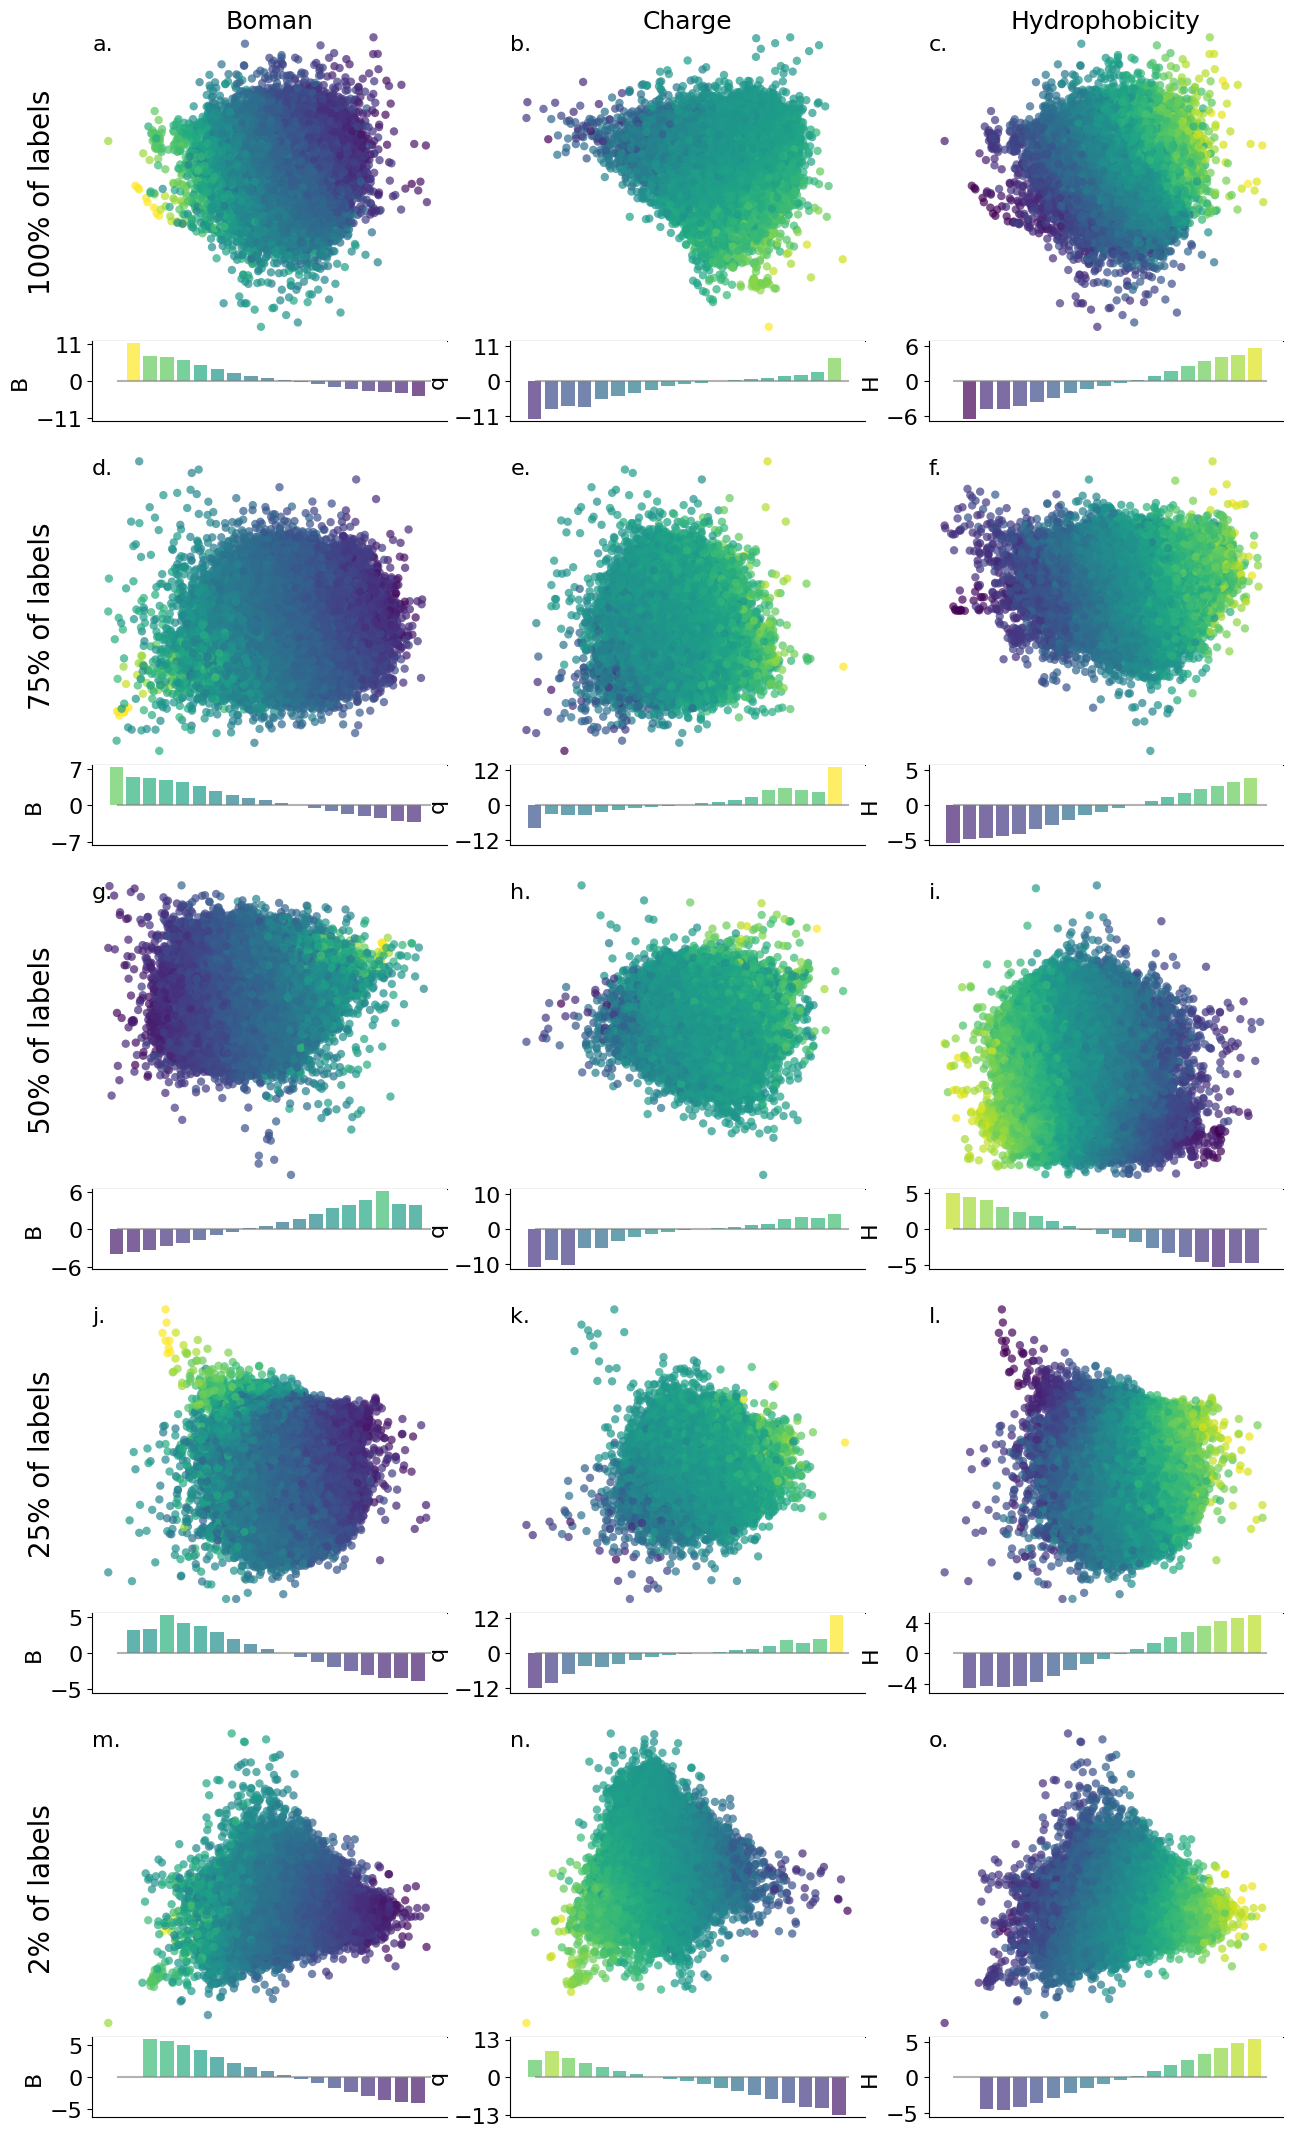

In [31]:
superfig = plt.figure(figsize=(12,21))
subfigs = superfig.subfigures(5, 3, wspace=0.15, hspace=0.05)
p1 = (df, "pc1", "pc2", "boman")
p2 = (df, "pc1", "pc5", "charge")
p3 = (df, "pc1", "pc2", "hydrophobicity")
p4 = None

percentages = [0,25,50,75,98]

pca = PCA(n_components=5)
for ix, _perc in enumerate(percentages):
    _key = f"bch-{_perc}"
    
    pca.fit(latent_spaces[_key])
    pca_latent_spaces = pca.transform(latent_spaces[_key])
    
    df = pd.DataFrame()
    for i in range(5):
        df[f'pc{i+1}'] = pca_latent_spaces[:,i]
    
    df['boman']          = bch_properties[         "boman"]
    df['charge']         = bch_properties['charge(pH=7.2)']
    df['hydrophobicity'] = bch_properties["hydrophobicity"]

    # df =df.sample(5000)
    
    p1 = (df, "pc1", "pc2", "boman")
    p2 = (df, "pc1", "pc5", "charge")
    p3 = (df, "pc1", "pc2", "hydrophobicity")
    for jx, _prop in enumerate(["boman", "charge", "hydrophobicity"]):

        # get principal components
        _pc1, _pc2 = get_top_2_most_correlated_PCs(df, _prop)
        _pc1, _pc2 = _pc2, _pc1

        print(f"subpanel: {subpanel_labels[(ix,jx)]}at {_perc=}, and organizing prop={_prop[0]}, the top two PCs are {_pc2}, {_pc1}")
        payload = (df, _pc1, _pc2, _prop)
        
        sf = subfigs[ix, jx]    
        sf = make_scatter_plot_w_barplot(payload[0], payload[1], payload[2], payload[3], sf)

        # add subpanel labels
        _ax = sf.get_axes()[0]
        _ax.annotate(
                subpanel_labels[(ix,jx)],
                xy=(0, 1), xycoords='axes fraction',
                xytext=(+0.0, -0.5), textcoords='offset fontsize',
                fontsize=16, verticalalignment='top', fontfamily='sans-serif',
                # bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0)
        )
        # add titles if first row
        if ix==0:
            sf.suptitle(f"{_prop.capitalize()}", fontsize=18, verticalalignment="baseline")
            pass

        if jx==0:
            sf.supylabel(f"{100-_perc}% of labels", fontsize=20, x=-0.165, y=0.575)
        
superfig.tight_layout()
# g = sns.JointGrid(data=df, x="col1", y="col2", hue="col3")
# g.plot_marginals(sns.distplot, kde=False, color="gray")
# g.plot_joint(plt.scatter, color="gray", alpha=.2)

In [29]:
SAVE_FIGURES

False

In [30]:
if not SAVE_FIGURES:
    superfig_filename = "figures/visualize_latent_space_bch_5x3_train"
    # superfig.savefig(f"{superfig_filename}.svg", dpi=300)
    superfig.savefig(f"{superfig_filename}.jpg", bbox_inches="tight", dpi=250)

In [ ]:
SAVE_FIGURES

# make SI figure of principal component explained variances

In [24]:
latent_spaces.keys()

dict_keys(['boman-0', 'boman-25', 'boman-50', 'boman-75', 'boman-98', 'hydrophobicity-0', 'hydrophobicity-25', 'hydrophobicity-50', 'hydrophobicity-75', 'hydrophobicity-98', 'chargepH7p2-0', 'chargepH7p2-25', 'chargepH7p2-50', 'chargepH7p2-75', 'chargepH7p2-98', 'boman-chargepH7p2-0', 'boman-chargepH7p2-25', 'boman-chargepH7p2-50', 'boman-chargepH7p2-75', 'boman-chargepH7p2-98', 'bch-0', 'bch-25', 'bch-50', 'bch-75', 'bch-98', 'predicted-log10mic-0', 'predicted-log10mic-98'])

In [49]:
import warnings

In [90]:
def plot_empty_window(ax:plt.Axes, xlims:list, ylims:list):
    ax.plot(
        xlims,
        ylims,
        color="gray"
    )
    ax.plot(
        xlims,
        [ylims[1], ylims[0]],
        color="gray"
    )

    ax.tick_params(
        bottom=False, 
        labelbottom=False,
        left=False,
        labelleft=False,
    )

    return ax

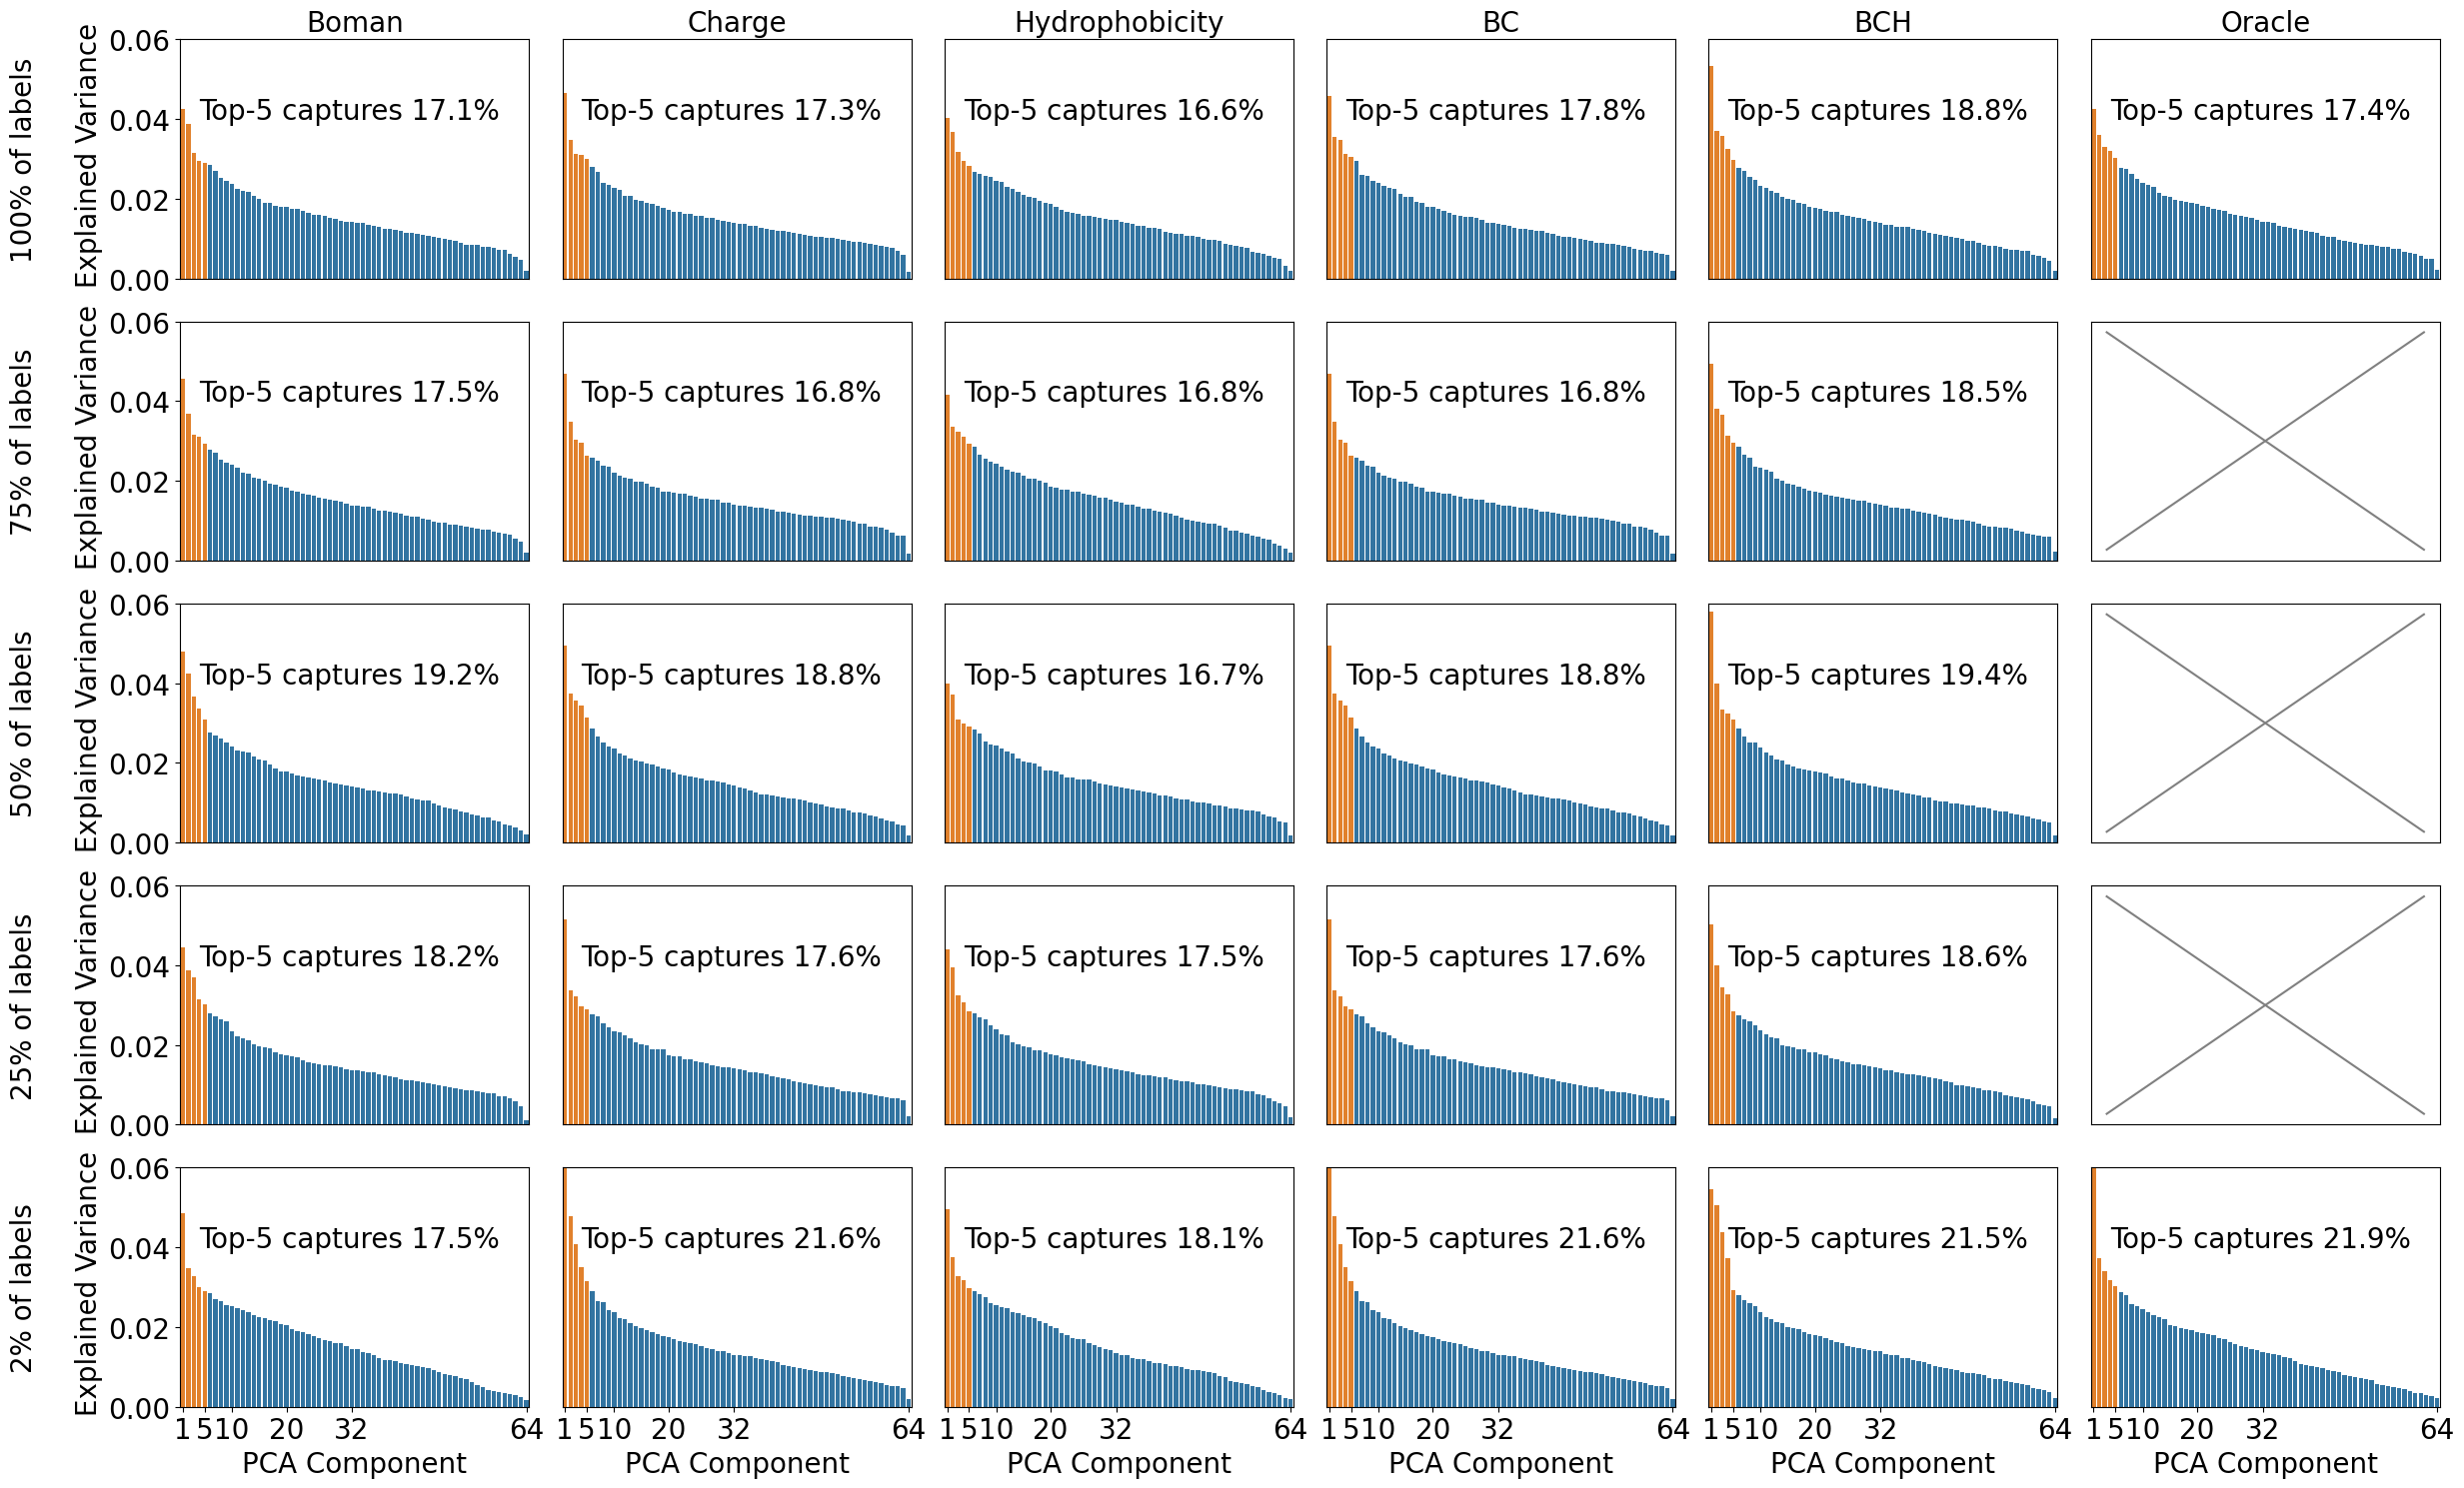

In [105]:
properties  = ["boman", "chargepH7p2", "hydrophobicity", "boman-chargepH7p2", "bch", "predicted-log10mic"] 
prop2title = {
    "boman": "Boman",
    "chargepH7p2": "Charge",
    "hydrophobicity": "Hydrophobicity",
    "boman-chargepH7p2": "BC",
    "bch": "BCH",
    "predicted-log10mic": "Oracle"
}


fig = plt.figure(figsize=(25, 15))
grid= fig.add_gridspec(5,6)

fontsize=20
_max_evr = -1
_max_key = ""
xlims=[0,64]
ylims=[0,0.06]
for ix, _prop in enumerate(properties):
    percentages = [0,25,50,75,98]
    if _prop=="predicted-log10mic":
        percentages = [0,98]
        
    for jx, _perc in enumerate(percentages):

        if len(percentages)==2:
            if jx==1:
                for _ in range(3):
                    ax = fig.add_subplot(grid[jx, ix])
                    ax = plot_empty_window(ax, xlims, ylims)

                    jx = jx + 1
            
        ax = fig.add_subplot(grid[jx,ix])
        
        pca = PCA(n_components=64)
        _key = f"{_prop}-{_perc}"
        
        pca.fit(latent_spaces[_key])

        if pca.explained_variance_ratio_[0]>_max_evr:
            _max_evr = pca.explained_variance_ratio_[0]
            _max_key = _key
            
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ax = sns.barplot(
                x=list(range(64)), 
                y=pca.explained_variance_ratio_,
                palette=["C1"]*5+["C0"]*59,
                ax=ax,
            )

        ax.set_ylim(ylims)

        _top5_captures = np.sum(pca.explained_variance_ratio_[:5])*100
        _top5_captures = round( _top5_captures, 1 )
        ax.text(x=3, y=0.04, s=f"Top-5 captures "+str(_top5_captures)+"%", fontsize=fontsize)
        _bottom_bool = False
        _labelbottom_bool = False
        _left_bool = False
        _labelleft_bool = False
        if jx==0:
            ax.set_title(f"{prop2title[_prop]}", fontsize=fontsize)
        
        elif jx==grid.nrows-1:
            _bottom_bool = True
            _labelbottom_bool = True

            _xticks = [0,4,9,19,31,63]
            _xticklabels = [1,5,10,20,32,64]
            ax.set_xticks(_xticks, labels=_xticklabels)
            ax.set_xlabel("PCA Component", fontsize=fontsize)

        if ix==0:
            ax.set_ylabel(f"{100-_perc}% of labels\n\n Explained Variance", fontsize=fontsize)
            
            _left_bool = True
            _labelleft_bool = True
            
        ax.tick_params(
            bottom=_bottom_bool, 
            labelbottom=_labelbottom_bool,
            left=_left_bool,
            labelleft=_labelleft_bool,
            labelsize=fontsize
        )

fig.tight_layout(w_pad=-0.9)

if SAVE_FIGURES:
    _fig_fname = "figures/explained_var_barplots_all"
    fig.savefig(f"{_fig_fname}.jpg",dpi=150)

In [97]:
SAVE_FIGURES

False

In [46]:
print(_max_evr,
      _max_key)

0.061206467 chargepH7p2-98


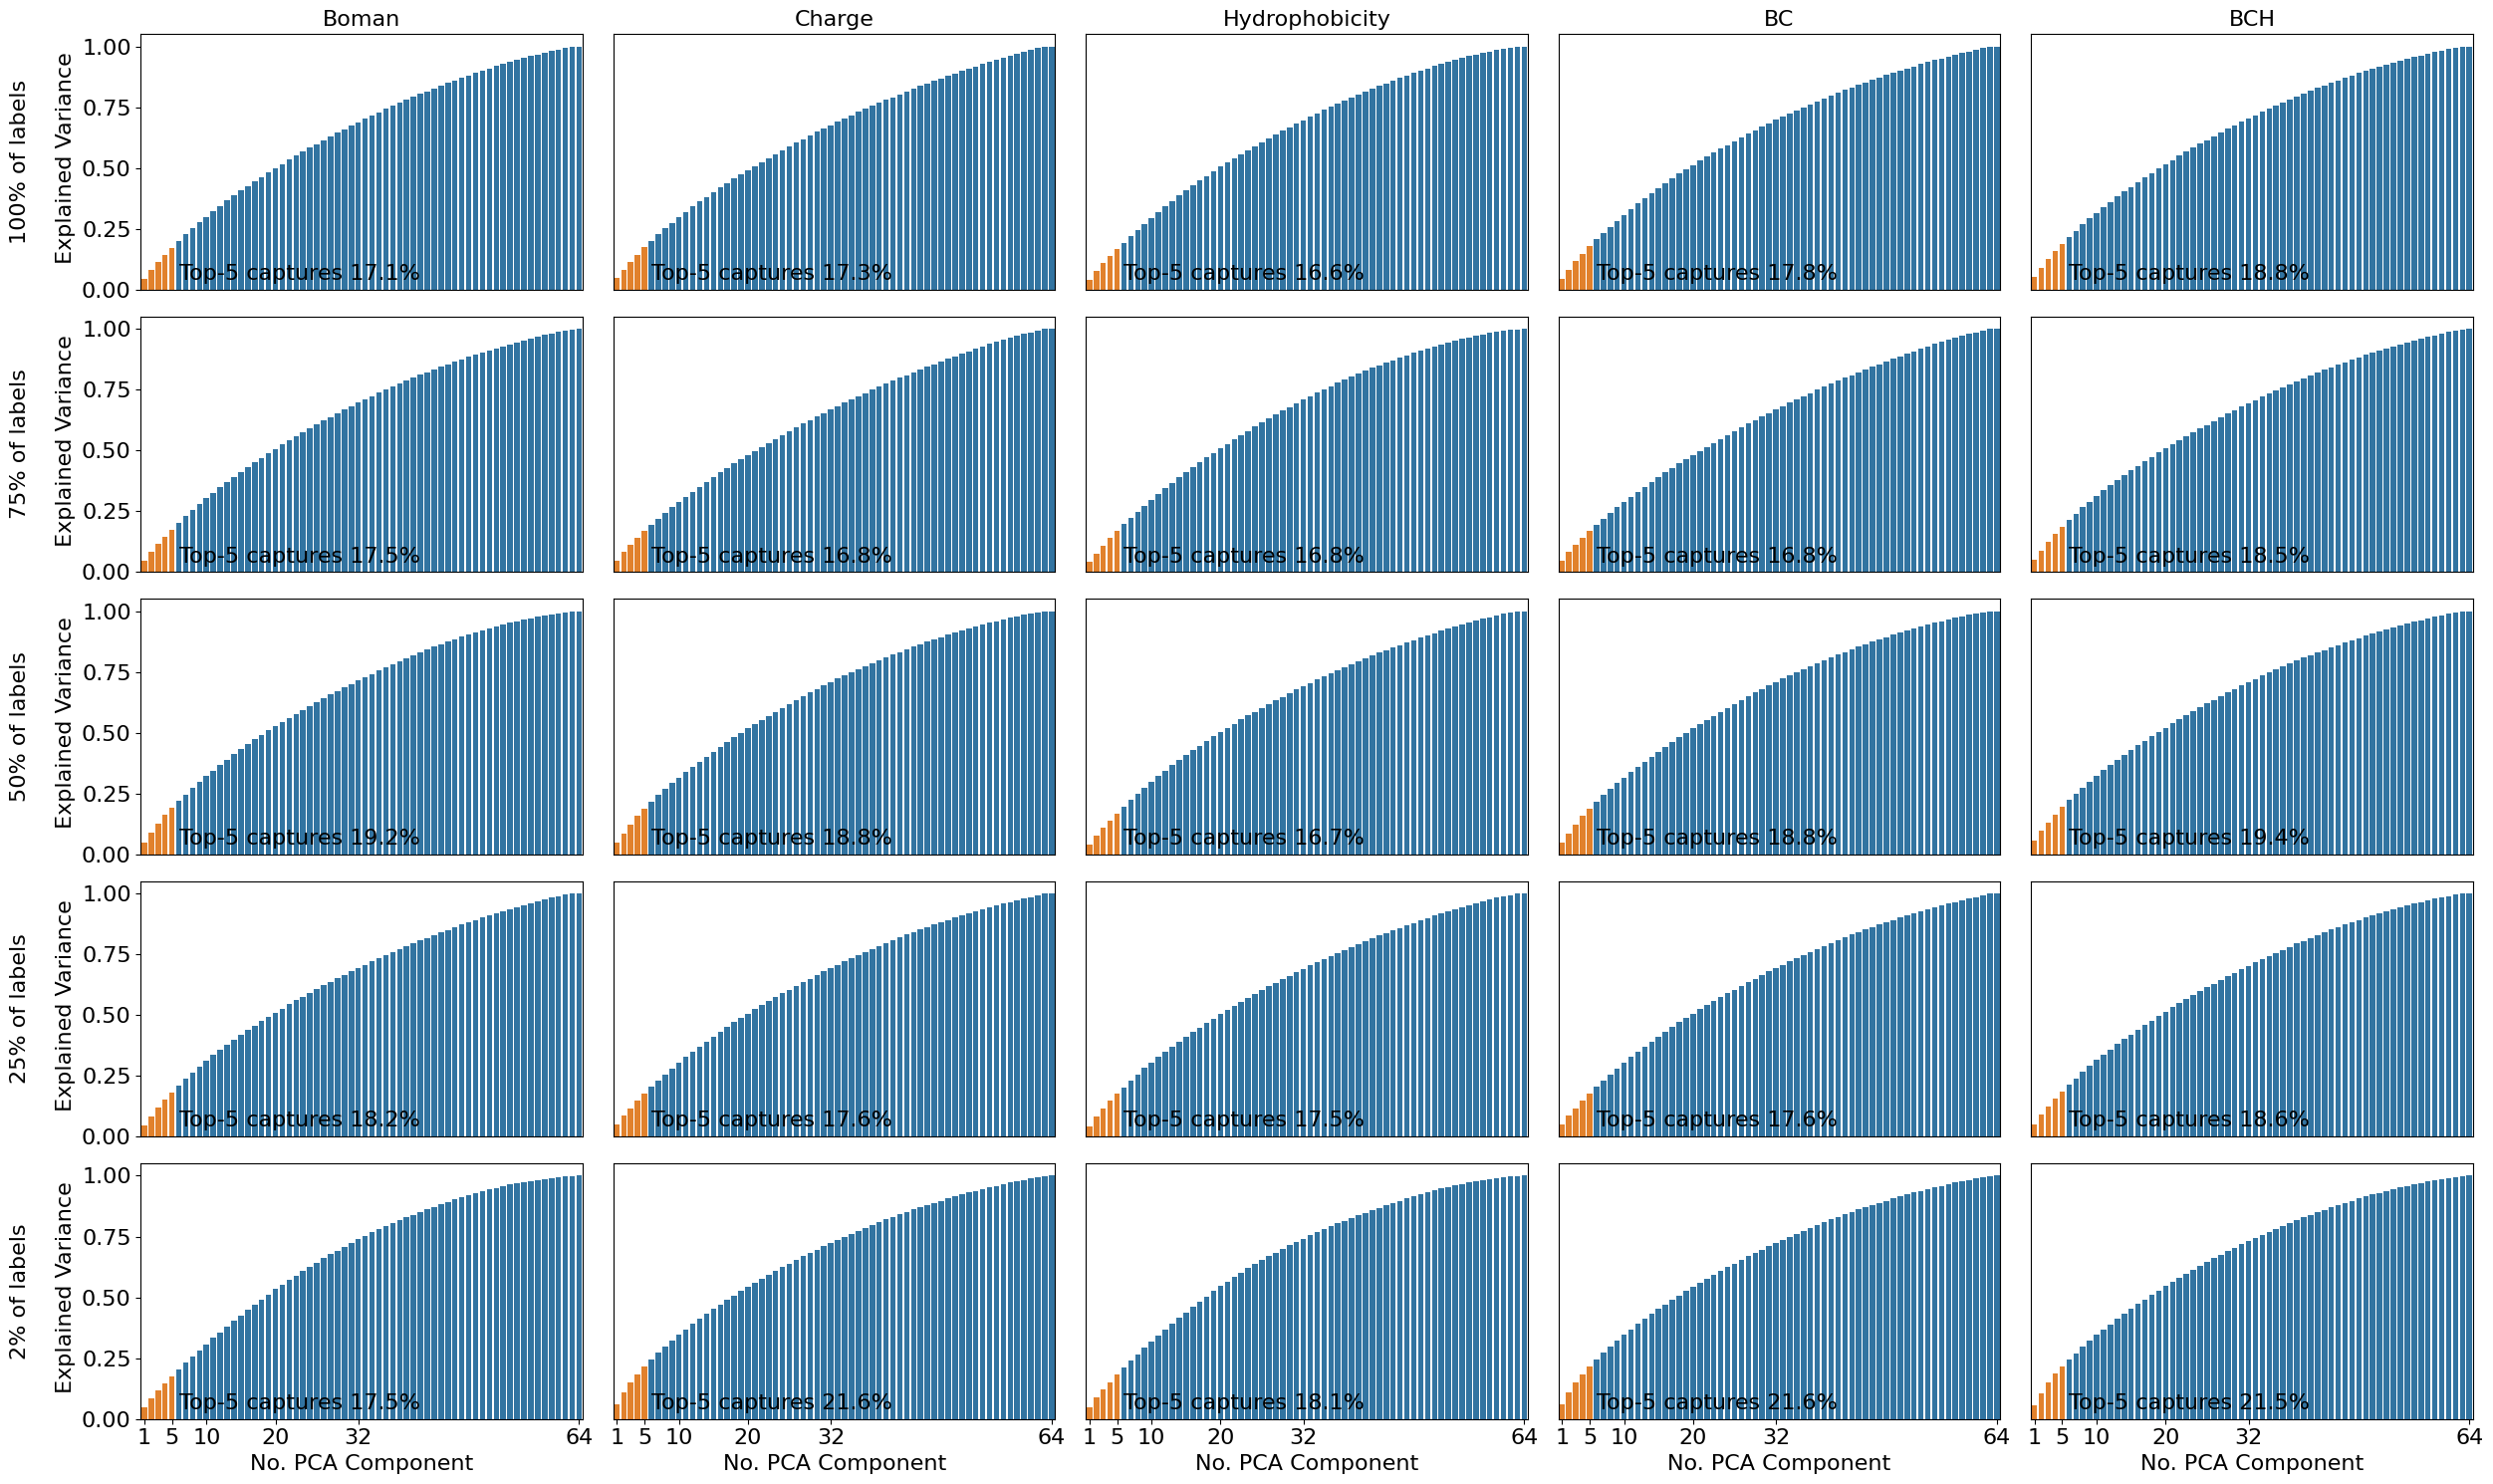

In [79]:
percentages = [0,25,50,75,98]
properties  = ["boman", "chargepH7p2", "hydrophobicity", "boman-chargepH7p2", "bch", ] 
prop2title = {
    "boman": "Boman",
    "chargepH7p2": "Charge",
    "hydrophobicity": "Hydrophobicity",
    "boman-chargepH7p2": "BC",
    "bch": "BCH"
}


fig = plt.figure(figsize=(25, 15))
grid= fig.add_gridspec(5,5)

_max_evr = -1
_max_key = ""
for ix, _prop in enumerate(properties):
    for jx, _perc in enumerate(percentages):

        ax = fig.add_subplot(grid[jx,ix])
        
        pca = PCA(n_components=64)
        _key = f"{_prop}-{_perc}"
        
        pca.fit(latent_spaces[_key])

        if pca.explained_variance_ratio_[0]>_max_evr:
            _max_evr = pca.explained_variance_ratio_[0]
            _max_key = _key
            
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ax = sns.barplot(
                x=list(range(64)), 
                y=np.cumsum(pca.explained_variance_ratio_),
                palette=["C1"]*5+["C0"]*59,
                ax=ax,
            )

        # ax.set_ylim([0,0.06])

        _top5_captures = np.sum(pca.explained_variance_ratio_[:5])*100
        _top5_captures = round( _top5_captures, 1 )
        ax.text(x=5, y=0.04, s=f"Top-5 captures "+str(_top5_captures)+"%", fontsize=16)
        _bottom_bool = False
        _labelbottom_bool = False
        _left_bool = False
        _labelleft_bool = False
        if jx==0:
            ax.set_title(f"{prop2title[_prop]}", fontsize=16)
        elif jx==len(properties)-1:
            _bottom_bool = True
            _labelbottom_bool = True

            _xticks = [0,4,9,19,31,63]
            _xticklabels = [1,5,10,20,32,64]
            ax.set_xticks(_xticks, labels=_xticklabels)
            ax.set_xlabel("No. PCA Component", fontsize=16)

        if ix==0:
            ax.set_ylabel(f"{100-_perc}% of labels\n\n Cumulative Explained Variance", fontsize=16)
            
            _left_bool = True
            _labelleft_bool = True
            
        ax.tick_params(
            bottom=_bottom_bool, 
            labelbottom=_labelbottom_bool,
            left=_left_bool,
            labelleft=_labelleft_bool,
            labelsize=16
        )

fig.tight_layout()

# Visualize BayesOpt trajectory in corresponding latent space

In [73]:
import torch
from transvae import trans_models
from transvae.transformer_models import TransVAE
from transvae.tvae_util import *

In [16]:
latent_spaces.keys()

dict_keys(['boman-0', 'boman-25', 'boman-50', 'boman-75', 'boman-98', 'hydrophobicity-0', 'hydrophobicity-25', 'hydrophobicity-50', 'hydrophobicity-75', 'hydrophobicity-98', 'chargepH7p2-0', 'chargepH7p2-25', 'chargepH7p2-50', 'chargepH7p2-75', 'chargepH7p2-98', 'boman-chargepH7p2-0', 'boman-chargepH7p2-25', 'boman-chargepH7p2-50', 'boman-chargepH7p2-75', 'boman-chargepH7p2-98', 'bch-0', 'bch-25', 'bch-50', 'bch-75', 'bch-98', 'predicted-log10mic-0', 'predicted-log10mic-98'])

In [46]:
_prop = "predicted-log10mic"
_perc = 0
_dim_method = "PCA"
_box_bounds = 10

search_space_to_runs = {}
search_space_to_run_sequences = {}

properties = ["boman", "chargepH7p2", "hydrophobicity", "boman-chargepH7p2", "bch", "predicted-log10mic"]
prop2abbreviation = {
    "boman": "b",
    "chargepH7p2": "c",
    "hydrophobicity":"h",
    "boman-chargepH7p2":"bc",
    "bch":"bch",
    "predicted-log10mic":"oracle"
}

dimensions = ["Id", 5]
for _prop in properties:
    abbreviated_prop = prop2abbreviation[_prop]
    if _prop == "predicted-log10mic":
        percentages = [0,98]
        dimensions = ["Id", 2,5,10,20,32]
    elif _prop == "bch":
        dimensions = ["Id", 2,5,10,20,32]
    else:
        dimensions = ["Id", 5]
        percentages = [0,25,50,75,98]
        
    for _perc_i, _perc in enumerate(percentages):
        for _, _n_pca_dims in enumerate(dimensions):
            model_name = make_model_name(_prop, 100, _perc)
            print(f"{model_name=}")
    
            
            if _n_pca_dims=="Id":
                
                prop_perc = f"{_n_pca_dims}-{_perc}-{abbreviated_prop}"
                runs = get_boloop_runs(model_name, _perc, "identity",_box_bounds)
            else:
                prop_perc = f"pca{_n_pca_dims}-{_perc}-{abbreviated_prop}"
                runs = get_boloop_runs(model_name, _perc, _dim_method,_box_bounds,n_pca_dims=_n_pca_dims)
            
            print(f"{prop_perc=}")
            
            runs_temp = {}
            for i, _run in enumerate(runs):
                _k = f"run_{i}"
                runs_temp[_k]=_run
            runs = runs_temp
            
            
            data=pd.DataFrame()
            sequence_data = pd.DataFrame()
            end_point = 500
            for i in range(5):
                if i==0:
                    if len(runs[f"run_{i}"]['iterations'] ) > end_point:
                        data['iterations']=runs[f"run_{i}"]['iterations'][:end_point]
                    else:
                        data['iterations']=runs[f"run_{i}"]['iterations']
                if len(runs[f"run_{i}"]["best_objective_values"]) > end_point:
                    data[f"run{i}"]=runs[f"run_{i}"]["best_objective_values"][:end_point]
                    sequence_data[f"run{i}"] = runs[f"run_{i}"]["best_sequences"][:end_point]
                else:
                    data[f"run{i}"]=runs[f"run_{i}"]["best_objective_values"]
                    sequence_data[f"run{i}"] = runs[f"run_{i}"]["best_sequences"]
    
            search_space_to_runs[prop_perc] = data
            search_space_to_run_sequences[prop_perc] = sequence_data
            # melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])
            

model_name='transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized'
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
prop_perc='Id-0-b'
model_name='transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized'
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
prop_perc='pca5-0-b'
model_name='transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
prop_perc='Id-25-b'
model_name='transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized'
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
pr

In [47]:
search_space_to_runs.keys()

dict_keys(['Id-0-b', 'pca5-0-b', 'Id-25-b', 'pca5-25-b', 'Id-50-b', 'pca5-50-b', 'Id-75-b', 'pca5-75-b', 'Id-98-b', 'pca5-98-b', 'Id-0-c', 'pca5-0-c', 'Id-25-c', 'pca5-25-c', 'Id-50-c', 'pca5-50-c', 'Id-75-c', 'pca5-75-c', 'Id-98-c', 'pca5-98-c', 'Id-0-h', 'pca5-0-h', 'Id-25-h', 'pca5-25-h', 'Id-50-h', 'pca5-50-h', 'Id-75-h', 'pca5-75-h', 'Id-98-h', 'pca5-98-h', 'Id-0-bc', 'pca5-0-bc', 'Id-25-bc', 'pca5-25-bc', 'Id-50-bc', 'pca5-50-bc', 'Id-75-bc', 'pca5-75-bc', 'Id-98-bc', 'pca5-98-bc', 'Id-0-bch', 'pca2-0-bch', 'pca5-0-bch', 'pca10-0-bch', 'pca20-0-bch', 'pca32-0-bch', 'Id-25-bch', 'pca2-25-bch', 'pca5-25-bch', 'pca10-25-bch', 'pca20-25-bch', 'pca32-25-bch', 'Id-50-bch', 'pca2-50-bch', 'pca5-50-bch', 'pca10-50-bch', 'pca20-50-bch', 'pca32-50-bch', 'Id-75-bch', 'pca2-75-bch', 'pca5-75-bch', 'pca10-75-bch', 'pca20-75-bch', 'pca32-75-bch', 'Id-98-bch', 'pca2-98-bch', 'pca5-98-bch', 'pca10-98-bch', 'pca20-98-bch', 'pca32-98-bch', 'Id-0-oracle', 'pca2-0-oracle', 'pca5-0-oracle', 'pca10-0-

In [20]:
search_space_to_runs["pca5-0-b"]

,iterations,run0,run1,run2,run3,run4
0,1,-0.713370,-0.714423,-0.721816,-0.707419,-0.708098
1,2,-0.713370,-0.594860,-0.721816,-0.707419,-0.708098
2,3,-0.713370,-0.594860,-0.721816,-0.703190,-0.708098
3,4,-0.713370,-0.562364,-0.683522,-0.608582,-0.646838
4,5,-0.713370,-0.562364,-0.683522,-0.608582,-0.646838
...,...,...,...,...,...,...
495,496,0.066031,0.201378,0.198014,0.149390,0.164128
496,497,0.066031,0.201378,0.198014,0.149390,0.164128
497,498,0.066031,0.201378,0.198014,0.149390,0.164128
498,499,0.140229,0.201378,0.198014,0.149390,0.164128


In [58]:
run_cols = [f"run{i}" for i in range(5)]

max_activity = -1e3
max_key = ""
max_run = ""
for _k, _df in search_space_to_runs.items():
    _prop = _k.split("-")[-1]
    if _prop not in ["bch", "oracle"]:
        continue
    _run_max_activities = _df[ run_cols ].max()
    _index_argmax = _run_max_activities.argmax()    
    
    _runN = _run_max_activities.index[_index_argmax]
    _runN_activity = _run_max_activities.iloc[_index_argmax]

    if _runN_activity > max_activity:
        max_activity = _runN_activity
        max_run = _runN
        max_key = _k

In [59]:
print(max_key, max_run, max_activity)

pca20-98-oracle run2 1.1682578568262683


In [154]:
best_sequences = search_space_to_run_sequences[max_key][max_run]
best_sequences_unique = list(pd.unique(best_sequences))
for _seq in best_sequences_unique:
    print(len(_seq), _seq)

78 MDSRAFSRPKCVGCGRTWNAMPDERKAFREGSGRKTPDGKVACRSSGRVFTPDLDGARALPEKGARLPSHTNAKRYQS
98 MADSKTRSGMTRTFRERKKTCAARGSPERAGILKDRRTGSRTFDRSKARKSGLKVPDTGLGVHTRALRDLSKAEAGPDVTGKFLHPEENSKAGKGRHQ
98 MQMTTKSARTEKSRRPAYAEASRASGSSLTRTERTGKARTDSLKVRTGSRARLTPKSALKVFTGSLPTRPIAVSGLTKLDALGFRRVAEATKKGGRHQ
95 MQTMQAKSASSTRREFRKASRTADRISTKDESVKTCASSARTRTARGASLRLSVRAMKTLPGTRILSFTLPAVKAGVRNALFSFRGTIAALPHSQ
81 MQTMQSKAAKVTRSFRSRKVKAIRTSRTEVRTVSPARATKKISVGACSTRLARKLTAGFVSVLKDLGGKSLSKILARSGDS
95 MQTMQSKSAKAERSYVRRTFATSCAASDSAASIKTRTCASVRTLKVRARSFSGLRVKTCNGIRALLNCGTRAALTRINSAGFTYLSALQAVRCSQ
78 MQTTMQAKKASSKFSRRSRVSIPEKSVFTASGKTVRAKTRAMKSIRTHSLTCLAGVLSMKVPASLIRFQKTGVTRWQA
98 MTQMQTAKSAASFSKRPSFVADSKVSVSRNAARVARAAFTSAKMLTRSLTCKAIGSSLTRTRVKGMIPLKGATLKERALTPVLYRDGNATASLRFHFQ
96 MNMQQASSATDESKRFTFAKSARTVLASATKAAPTVRSLTKGALSMKTFGVRSRLTGLNKIRARQLAGHTSEVLKNISAGTRRFFLQAAGDLRGNQ
98 MQMTTNAMAAAAKRSRFRLSKCEVSSMATKAVRTAFASHTVRALVRAKIFGTRLKVGLTLPKSRNLIGRVLAAGAPTGLTLKNWRKAIAASVGLPYFQ
96 MQMQAAFASTDSTKFKSKNKAASERTTASVSKTAKALTSFTA

In [74]:
### get model
_model_number = 100
_model_name = make_model_name("predicted-log10mic",100, 98)

model_src = "checkpointz/" + _model_name + f"/{_model_number}_{_model_name}.ckpt"
device=torch.device("cpu")
device_str="cpu"

model_obj=torch.load(model_src, map_location=device)
model = TransVAE(load_fn=model_src, workaround=device_str, params=model_obj['params'])
# model = RNN(load_fn=model_src, workaround="cpu")
model.params['HARDWARE']= device_str

model.model.eval()

/tmp/ipykernel_59403/2425256291.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_obj=torch.load(model_src, map_location=device)
/home/jyler/projects/compare-latent-

EncoderDecoder(
  (encoder): VAEEncoder(
    (layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (self_attn): MultiHeadedAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=512, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0-1): 2 x SublayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (conv_bottleneck): ConvBottleneck(
      (conv_layers): ListModule(
        (0): Sequential(
          (0): Conv1d(512, 288, kernel_size=(9,), stride=(1,))
          (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, 

In [76]:
model.params["BATCH_SIZE"] = int(len(best_sequences_unique))#_run_length

_sequences = best_sequences_unique
_processed_sequences = []
for _seq in _sequences:
    _processed_sequences.append( _seq.split("<end>")[0] )
sequences = np.array(_processed_sequences).reshape(-1,1)

with torch.no_grad():
    _, mu, _ = model.calc_mems(sequences, log=False, save=False)

mols_data.shape=torch.Size([17, 127]), props_data.shape=torch.Size([17, 1])


In [77]:
mu.shape

(17, 64)

In [98]:
pca = PCA(n_components=5)
pca.fit(latent_spaces['predicted-log10mic-98'])
pca_latent_space = pca.transform(latent_spaces['predicted-log10mic-98'])
pca_mu = pca.transform(mu)

In [99]:
pca_mu.shape

(17, 5)

In [88]:
oracle_values_train = pd.read_csv("data/peptides_predicted_log10_mic_train.txt")

In [90]:
oracle_values_train.head(2)

,peptides,predicted_mic
0,CREKA,2.190306
1,RRWQW,1.660048


In [91]:
df = pd.DataFrame()
for i in range(pca.n_components):
    df[f'pc{i+1}'] = pca_latent_space[:,i]

df['boman']          = bch_properties[         "boman"]
df['charge']         = bch_properties['charge(pH=7.2)']
df['hydrophobicity'] = bch_properties["hydrophobicity"]
df['oracle']         = oracle_values_train["predicted_mic"]

In [128]:
_pc1, _pc2 = get_top_2_most_correlated_PCs(df, "oracle")

/tmp/ipykernel_59403/57016424.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_col3_per_bin = df.groupby("col2_bin")[col3].mean()


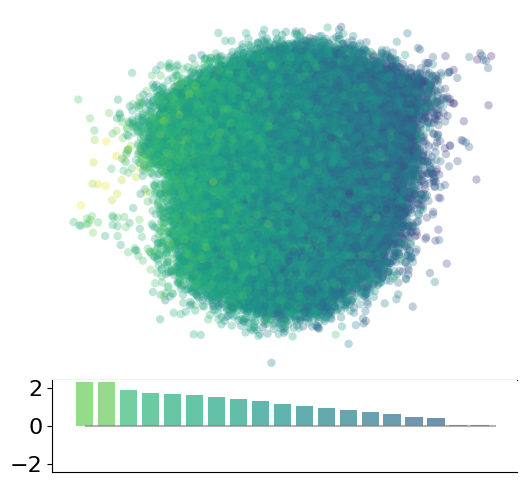

In [233]:
fig = plt.figure(figsize=(6,6))
fig = make_scatter_plot_w_barplot(df, _pc2, _pc1, "oracle", fig, alpha=0.3)

In [234]:
_ax_scatter = fig.get_axes()[0]
_ax_scatter.scatter(
    pca_mu[:,0], 
    pca_mu[:,1], 
    color=sns.color_palette("rocket_d",n_colors=17),
    s=(10)**2
)

for i in range(len(pca_mu)):
    _ax_scatter.text(
        x = pca_mu[i,0], 
        y = pca_mu[i,1], 
        s = str(i+1), 
        horizontalalignment="center", 
        verticalalignment="center",
        # color=sns.color_palette("Greys", n_colors=17)[i],
        color="white",
        fontsize=10,
    )

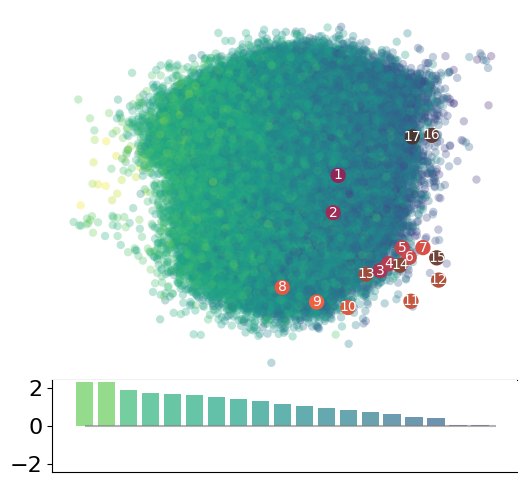

In [235]:
fig

In [236]:
if SAVE_FIGURES:
    fig.savefig("figures/visualization_best_sequences_oracle2percent.jpg", dpi=300)

## Use ESMFold to predict structures of ccoresponding sequences

In [145]:
from transformers import AutoTokenizer, EsmForProteinFolding


def sequence_to_pdb_esm(sequence, seq_id, model, tokenizer):
    #model_path = "./pepstructure/esmfold_v1/"
    if not os.path.isdir( os.path.join(os.getcwd(),model_path) ):
        raise Exception("""Model path does not exist: {}\n
                        current directory is: {}""".format(model_path, os.getcwd())
        )
    
    #logging.info("Loading model...")
    #model = EsmForProteinFolding.from_pretrained(
    #                    model_path,
    #                    local_files_only=True
    #)
    #tokenizer = AutoTokenizer.from_pretrained(
    #                    model_path,
    #                    local_files_only=True
    #)

    inputs = tokenizer([sequence], return_tensors="pt", add_special_tokens=False)

    t0 = time.time()
    with torch.no_grad():
        outputs = model.infer_pdb(sequence)
    tf = time.time()
    print(tf-t0)
    fname = f"esm_output_{seq_id}.pdb"
    fpath = os.path.join("./temp_structure_files/", fname)
    with open(fpath, "w") as f:
        f.write(outputs)

    return fpath

In [146]:
os.getcwd()

'/home/jyler/projects/compare-latent-spaces-amps'

In [147]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model_path = "../project-amp-vs-hemolytic/esmfold_v1/"
print(model_path)

cuda
../project-amp-vs-hemolytic/esmfold_v1/


In [148]:
esmfold_model = EsmForProteinFolding.from_pretrained(
                    model_path,
                    local_files_only=True
)
esmfold_tokenizer = AutoTokenizer.from_pretrained(
                    model_path,
                    local_files_only=True
)

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at ../project-amp-vs-hemolytic/esmfold_v1/ and are newly initialized: ['esm.contact_head.regression.bias', 'esm.contact_head.regression.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [153]:
esmfold_output_files_paths = []
for i, _seq in enumerate(best_sequences_unique):
    print(f"on {i+1}/{len(best_sequences_unique)}")
    _esmfold_output = sequence_to_pdb_esm(_seq, i, esmfold_model, esmfold_tokenizer)
    esmfold_output_files_paths.append(_esmfold_output)
    print()

on 1/17
119.06626081466675

on 2/17
152.18540811538696

on 3/17
151.99446082115173

on 4/17
147.36528706550598

on 5/17
123.5930061340332

on 6/17
146.78094577789307

on 7/17
118.7757785320282

on 8/17
152.03085160255432

on 9/17
149.27496814727783

on 10/17
152.32635354995728

on 11/17
148.9085705280304

on 12/17
148.32705545425415

on 13/17
148.92141318321228

on 14/17
147.06947588920593

on 15/17
110.89454412460327

on 16/17
107.75252223014832

on 17/17
107.88912153244019



### interpolate a purple colour range

In [237]:
colour_palette = sns.color_palette("rocket_d", n_colors=17)

In [238]:
colour_palette

[(0.5640186844705882, 0.14623459105882353, 0.3445585565490196),
 (0.6107542289411765, 0.17451338211764705, 0.33458459309803923),
 (0.6574897734117647, 0.20279217317647058, 0.32461062964705883),
 (0.704225317882353, 0.2310709642352941, 0.31463666619607844),
 (0.7542991155294118, 0.2613696689411765, 0.30395027678431374),
 (0.80103466, 0.28964846, 0.29397631333333335),
 (0.8477702044705883, 0.3179272510588236, 0.28400234988235296),
 (0.8945057489411765, 0.34620604211764705, 0.27402838643137256),
 (0.9399970458039216, 0.3748065751372549, 0.2634484130980392),
 (0.8584225683137255, 0.35553655898039216, 0.2564540998431373),
 (0.7768480908235293, 0.3362665428235294, 0.24945978658823528),
 (0.6952736133333334, 0.31699652666666667, 0.24246547333333332),
 (0.6136991358431373, 0.2977265105098039, 0.23547116007843139),
 (0.5262979099607843, 0.277080064627451, 0.22797725301960783),
 (0.44472343247058826, 0.25781004847058825, 0.2209829397647059),
 (0.3631489549803921, 0.2385400323137255, 0.21398862650980394),
 (0.28157447749019604, 0.21927001615686276, 0.20699431325490197)]

In [240]:
long_cmd = ""
for i in range(len(colour_palette)):
    long_cmd += f"color #{i+1} {colour_palette.as_hex()[i]};"
print(long_cmd)

color #1 #902558;color #2 #9c2d55;color #3 #a83453;color #4 #b43b50;color #5 #c0434e;color #6 #cc4a4b;color #7 #d85148;color #8 #e45846;color #9 #f06043;color #10 #db5b41;color #11 #c65640;color #12 #b1513e;color #13 #9c4c3c;color #14 #86473a;color #15 #714238;color #16 #5d3d37;color #17 #483835;


In [ ]:
# text positioning command
text_positioning_cmd = ""
for _row_i in range(4):
    for _col_i in range(5):
        _xpos = 0.15 + 0.15*_col_i

# Latin Hypercube Sampling

In [9]:
from scipy.stats import qmc
import matplotlib.pyplot as plt

In [5]:
lhs_sampler = qmc.LatinHypercube(d=2)

In [6]:
x_init = lhs_sampler.random(10)

In [7]:
x_init.shape

(10, 2)

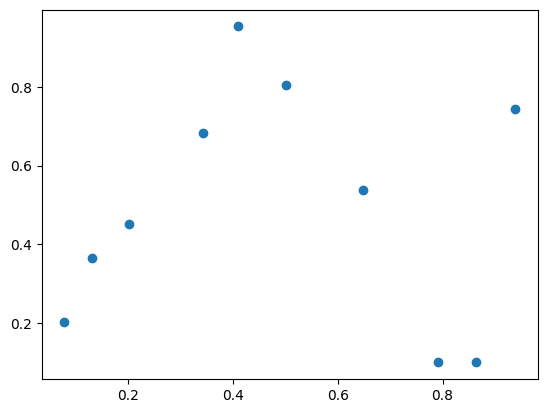

In [10]:
plt.scatter(x_init[:,0], x_init[:,1])

In [18]:
print(bch_properties.shape, 
      bch_properties_test.shape)

(523848, 3) (141924, 3)


In [20]:
bch_properties.shape[0] + bch_properties_test.shape[0]

665772

In [21]:
total = 0
for i in range(30,100,1):
    total+= 7500

In [22]:
total

525000